## Test notebook for nlo.py module

In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt
import time
import scipy
import copy
from matplotlib import cm
from matplotlib.colors import Normalize

#This are my libraries
import nlo 
from util import sech

In [2]:
from scipy.constants import pi, c
c = c*1e-12; #mm/fs, [Freq]=PHz

## Test pulse creation

In [3]:
NFFT = 2**8 #Number of FFT points

Tmax = 500 #(fs) (window will go from -Tmax to Tmax)
t = np.linspace(-Tmax, Tmax, NFFT, endpoint=False)
dt = t[1]-t[0] #Sampling period
print('Sampling Rate =', dt, 'fs')

#Parameters
wl0 = 1e-3 #center wavelength (mm)
f0 = c/wl0*1e3
print('Center frequency = %0.3f THz' %(f0))
 
pwr = 0.5 #Averagepower (W)
Tp = 70 #Pulse width (fs)

#Pulse creation
tau = Tp/1.76
pulse = np.sqrt(0.88*4e6/Tp*pwr)*sech(t/tau) #*np.exp(1j*t)

Sampling Rate = 3.90625 fs
Center frequency = 299.792 THz


## Plotting functions test

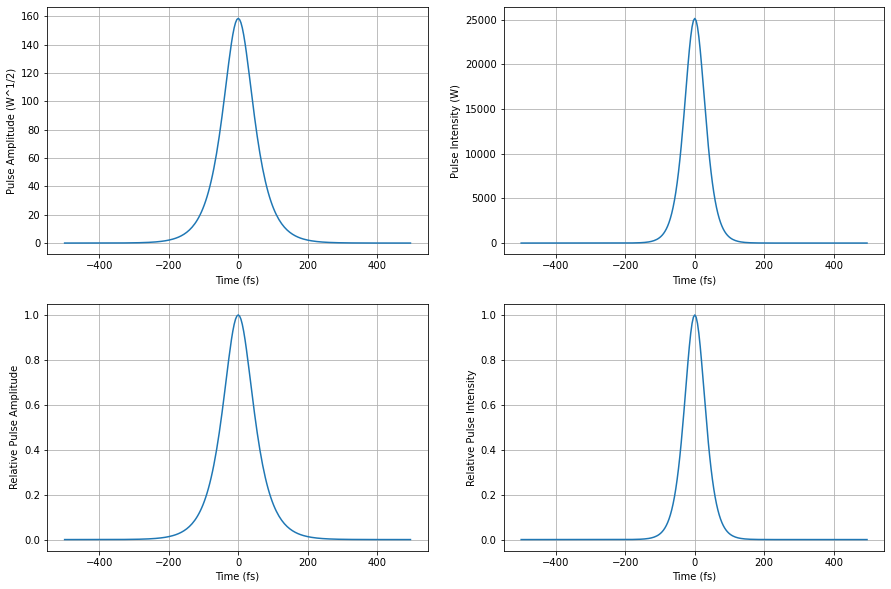

In [4]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

nlo.plot_mag(t, pulse, ax=ax1);
nlo.plot_magsq(t, pulse, ax=ax2);
nlo.plot_mag_relative(t, pulse, ax=ax3);
nlo.plot_magsq_relative(t, pulse, ax=ax4);

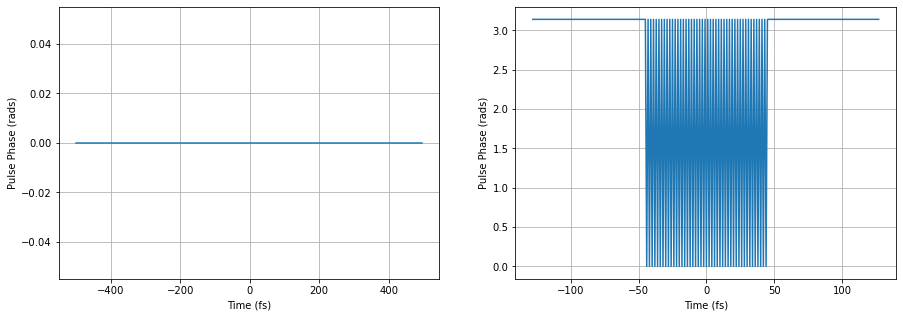

In [5]:
plt.rcParams['figure.figsize'] = [15, 5] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

nlo.plot_phase_vs_time(t, pulse, ax=ax1);
nlo.plot_phase_vs_freq(t, pulse, ax=ax2);

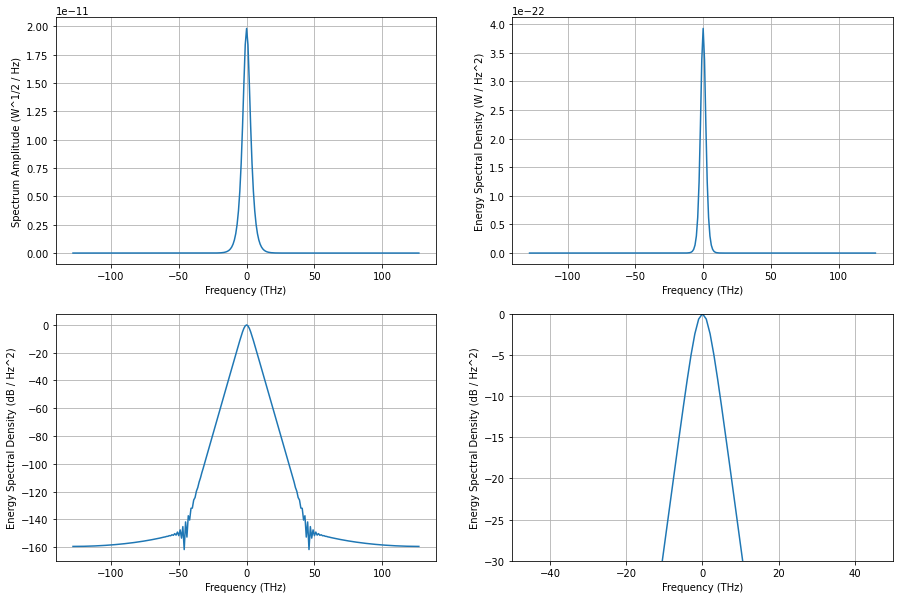

In [6]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

nlo.plot_spectrum(t, pulse, ax=ax1);
nlo.plot_ESD(t, pulse, ax=ax2);
nlo.plot_ESD_dB(t, pulse, ax=ax3);
nlo.plot_ESD_dB(t, pulse, ax=ax4, xlim=[-50,50], ylim=[-30,0]);

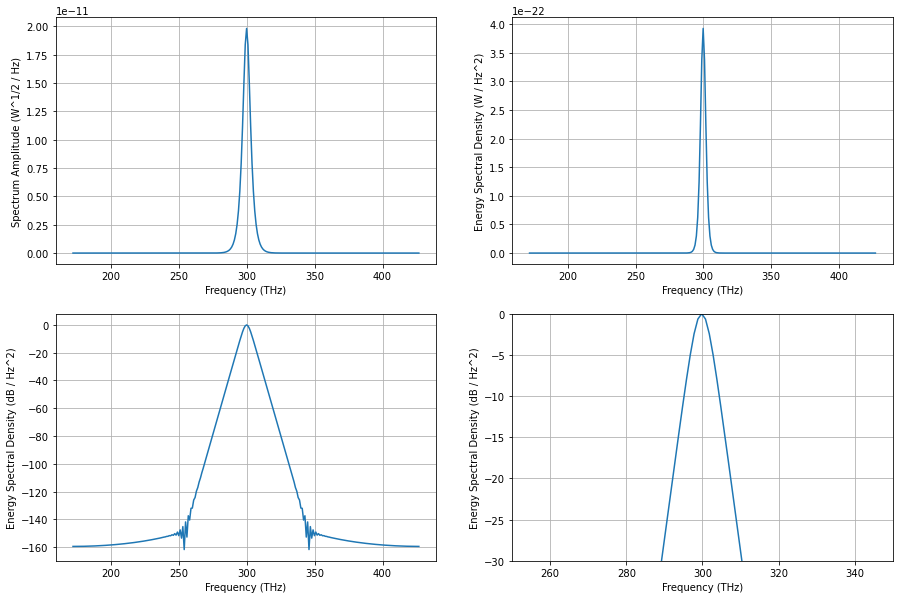

In [7]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

nlo.plot_spectrum_absfreq(t, pulse, f0, ax=ax1);
nlo.plot_ESD_absfreq(t, pulse, f0, ax=ax2);
nlo.plot_ESD_dB_absfreq(t, pulse, f0, ax=ax3);
nlo.plot_ESD_dB_absfreq(t, pulse, f0, ax=ax4, xlim=[250,350], ylim=[-30,0]);

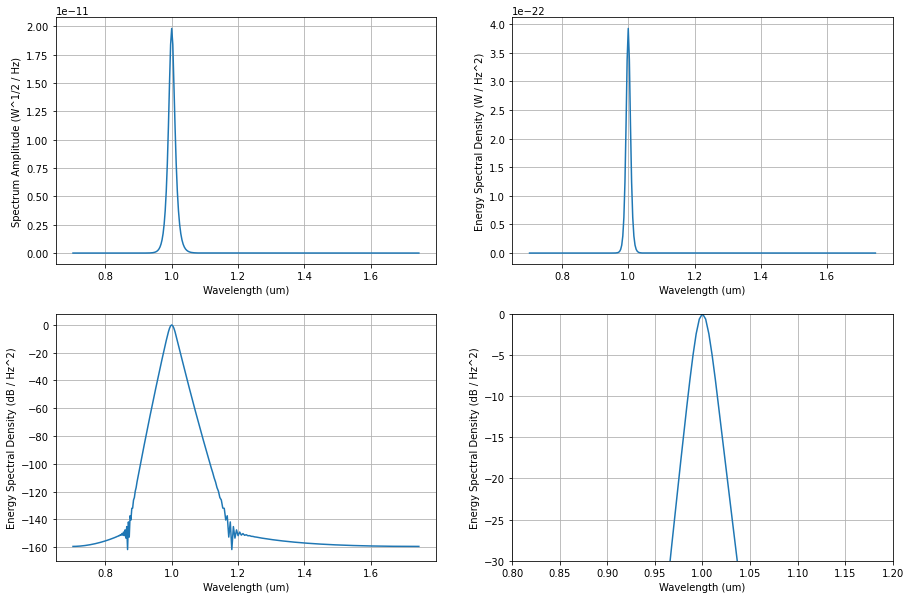

In [8]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

nlo.plot_spectrum_vs_wavelength(t, pulse, f0, ax=ax1);
nlo.plot_ESD_vs_wavelength(t, pulse, f0, ax=ax2);
nlo.plot_ESD_dB_vs_wavelength(t, pulse, f0, ax=ax3);
nlo.plot_ESD_dB_vs_wavelength(t, pulse, f0, ax=ax4, xlim=[0.8,1.2], ylim=[-30,0]);

## Check energy calculation functions

In [9]:
print(format(nlo.energy_td(t, pulse)*1e9, '0.3e'), 'nJ')
print(format(nlo.energy_fd(t, pulse)*1e9, '0.3e'), 'nJ')

2.000e+00 nJ
2.000e+00 nJ


# Now, let's re-check all this using the pulse class

In [10]:
pulse = nlo.pulse(t, pulse, wl0*1e3)

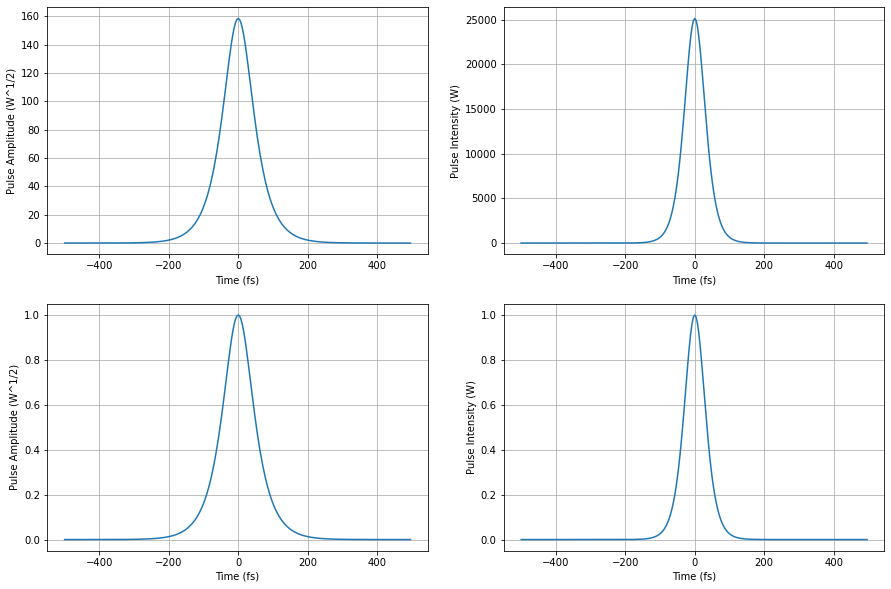

In [11]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulse.plot_mag(ax=ax1);
pulse.plot_magsq(ax=ax2);
pulse.plot_mag_relative(ax=ax3);
pulse.plot_magsq_relative(ax=ax4);

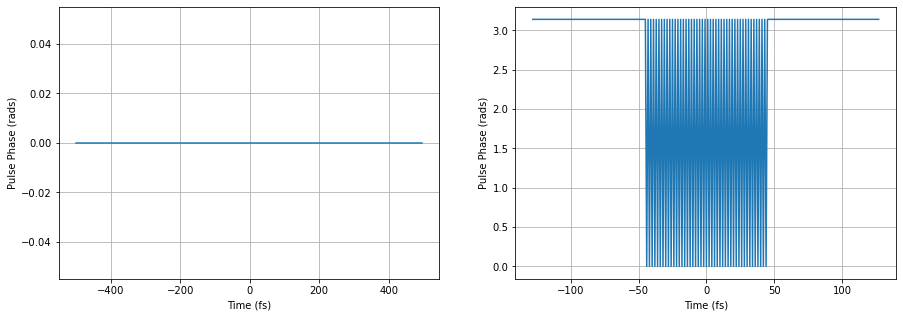

In [12]:
plt.rcParams['figure.figsize'] = [15, 5] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pulse.plot_phase_vs_time(ax=ax1);
pulse.plot_phase_vs_freq(ax=ax2);

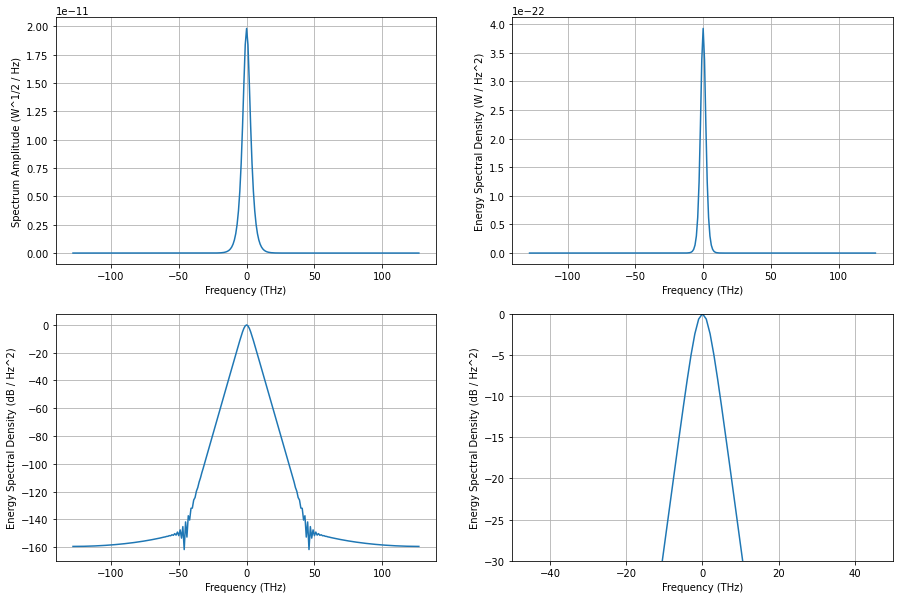

In [13]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulse.plot_spectrum(ax=ax1);
pulse.plot_ESD(ax=ax2);
pulse.plot_ESD_dB(ax=ax3);
pulse.plot_ESD_dB(ax=ax4, xlim=[-50,50], ylim=[-30,0]);

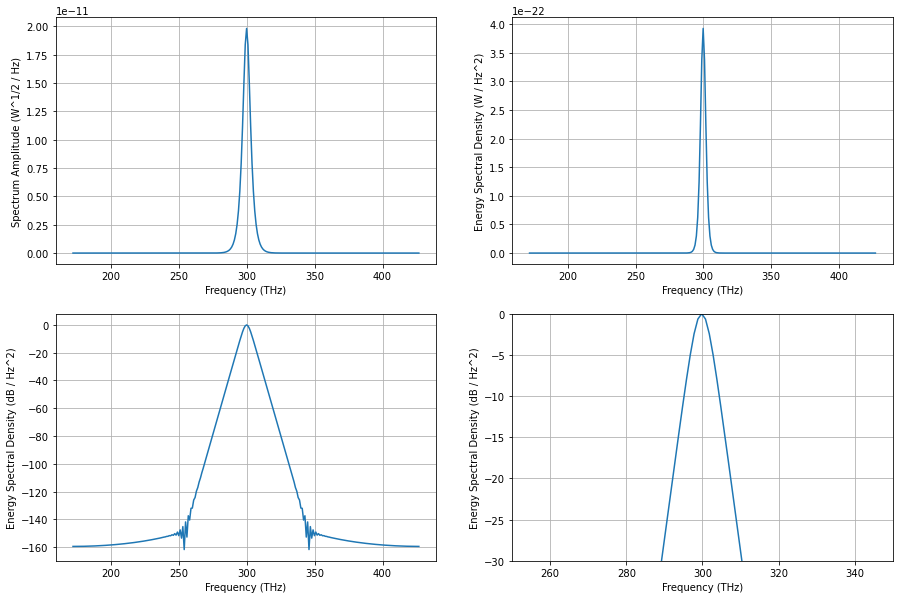

In [14]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulse.plot_spectrum_absfreq(ax=ax1);
pulse.plot_ESD_absfreq(ax=ax2);
pulse.plot_ESD_dB_absfreq(ax=ax3);
pulse.plot_ESD_dB_absfreq(ax=ax4, xlim=[250,350], ylim=[-30,0]);

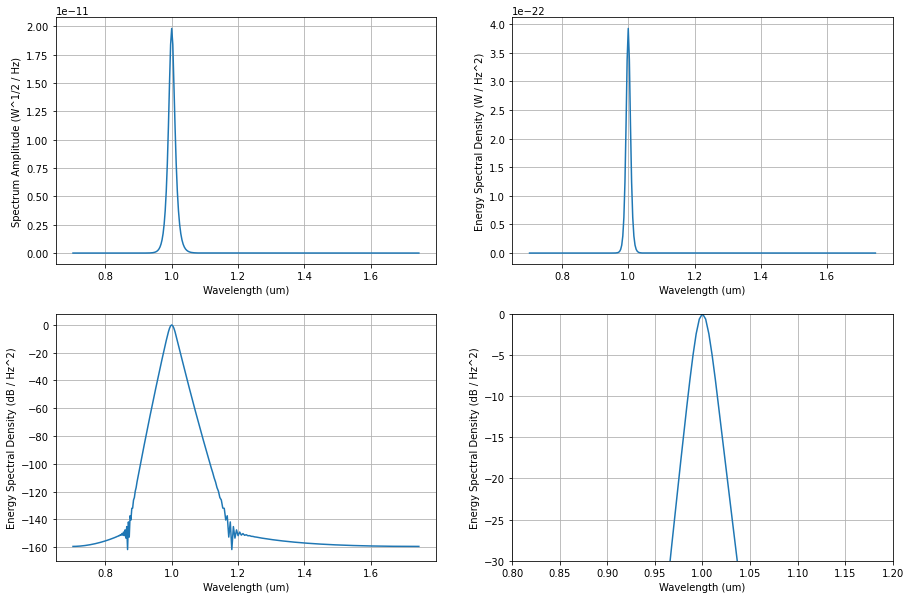

In [15]:
plt.rcParams['figure.figsize'] = [15, 10] # Change size of plots

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pulse.plot_spectrum_vs_wavelength(ax=ax1);
pulse.plot_ESD_vs_wavelength(ax=ax2);
pulse.plot_ESD_dB_vs_wavelength(ax=ax3);
pulse.plot_ESD_dB_vs_wavelength(ax=ax4, xlim=[0.8,1.2], ylim=[-30,0]);

In [17]:
print(format(pulse.energy_td()*1e9, '0.3e'), 'nJ')
print(format(pulse.energy_fd()*1e9, '0.3e'), 'nJ')

2.000e+00 nJ
2.000e+00 nJ
